# Datobaseret Beregning af Dødsfald & Mandskab 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

## Beregning af Mandskab Ombord på Skibene

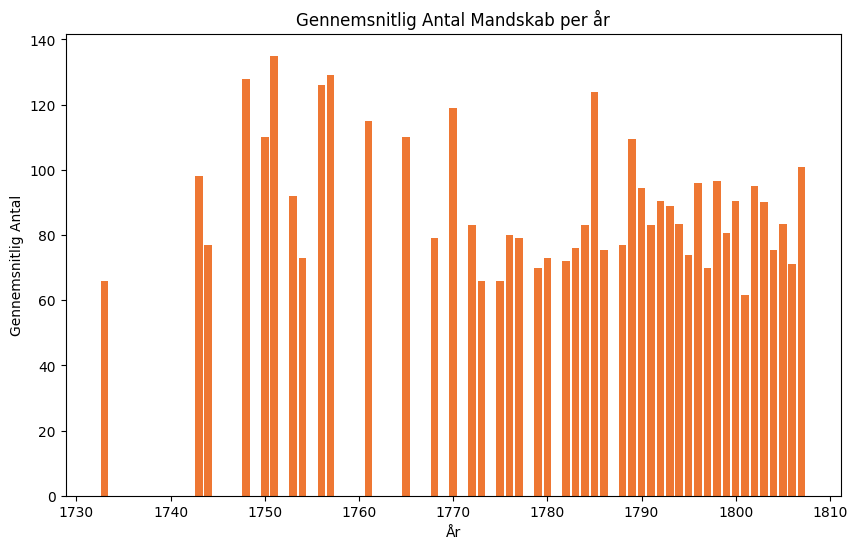

In [2]:
df = pd.read_excel("datasheet.xlsx", sheet_name='Sheet2')

df_sheet2_filtered = df.dropna(subset=['antal'])
df_avg_antal_per_year = df.groupby('år')['antal'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_avg_antal_per_year['år'], df_avg_antal_per_year['antal'], color='#EE7733')
plt.title('Gennemsnitlig Antal Mandskab per år')
plt.xlabel('År')
plt.ylabel('Gennemsnitlig Antal')
plt.show()

Den ovenstående graf er en smule uoverskuelig. Derfor er der nedenfor lavet en ny graf med et 5-års rullende gennemsnit, som burde give et tydeligere overblik.

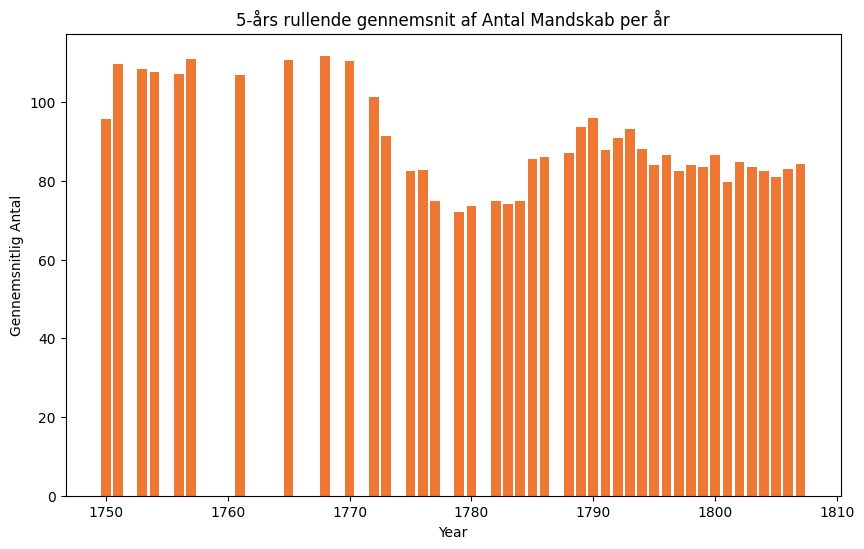

In [3]:
df_avg_antal_per_year['5_year_avg'] = df_avg_antal_per_year['antal'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.bar(df_avg_antal_per_year['år'], df_avg_antal_per_year['5_year_avg'], color='#EE7733')
plt.title('5-års rullende gennemsnit af Antal Mandskab per år')
plt.xlabel('Year')
plt.ylabel('Gennemsnitlig Antal')
plt.show()

## Beregning af Dødsfald per År

Denne kode indlæser data, grupperer dataene efter år og beregner den gennemsnitlige procent døde for hvert år. 

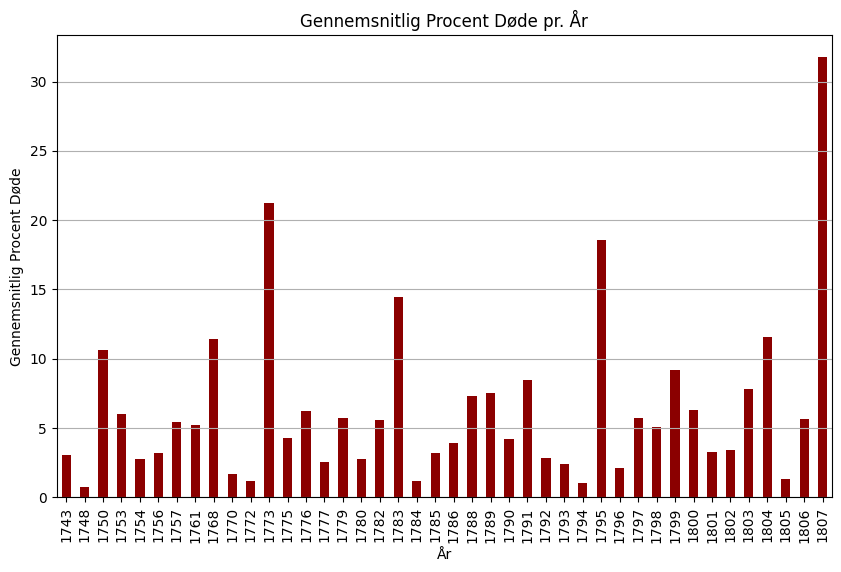

In [4]:
df = pd.read_excel("datasheet.xlsx", sheet_name='Sheet2') # Det er nødvendigt at definere DataFrame igen, da jeg ændrer på det i denne sektion. Dette betyder, at koden kun vil virke én gang, inden man får en fejl.
if 'år' in df.columns and 'procent_døde' in df.columns:
    df['år'] = pd.to_numeric(df['år'], errors='coerce')
    df['procent_døde'] = pd.to_numeric(df['procent_døde'], errors='coerce')

    # Gruppering efter år og beregning af den gennemsnitlige procent døde for hvert år, hvor NA-værdier ignoreres
    average_percent_døde_by_year = df.groupby('år')['procent_døde'].mean()
    average_percent_døde_by_year = average_percent_døde_by_year.dropna()

    plt.figure(figsize=(10, 6))
    average_percent_døde_by_year.plot(kind='bar', color='darkred')
    plt.title('Gennemsnitlig Procent Døde pr. År')
    plt.xlabel('År')
    plt.ylabel('Gennemsnitlig Procent Døde')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()
else:
    print("FEJL") # Dette kunne gøres meget bedre... 

In [5]:
years = average_percent_døde_by_year.index.values
percent_døde_values = average_percent_døde_by_year.values
slope, intercept, r_value, p_value, std_err = linregress(years, percent_døde_values)
trend = slope * years + intercept
(slope, intercept, r_value, p_value, std_err)

(0.06544889062666055,
 -110.28124796305258,
 0.1951511057326017,
 0.21552871406192078,
 0.05200796517493448)

In [6]:
# Fjernelse af 1807
average_percent_døde_by_year_filtered = average_percent_døde_by_year.drop(labels=1807, errors='ignore')

years_filtered = average_percent_døde_by_year_filtered.index.values
percent_døde_values_filtered = average_percent_døde_by_year_filtered.values
slope_filtered, intercept_filtered, r_value_filtered, p_value_filtered, std_err_filtered = linregress(years_filtered, percent_døde_values_filtered)

# Trend
trend_filtered = slope_filtered * years_filtered + intercept_filtered
(slope_filtered, intercept_filtered, r_value_filtered, p_value_filtered, std_err_filtered)


(0.017928279628975616,
 -26.18717230234126,
 0.06998773456157345,
 0.6636966041616628,
 0.040918350259464484)

## Månedsbaseret Beregning af Dødsfald

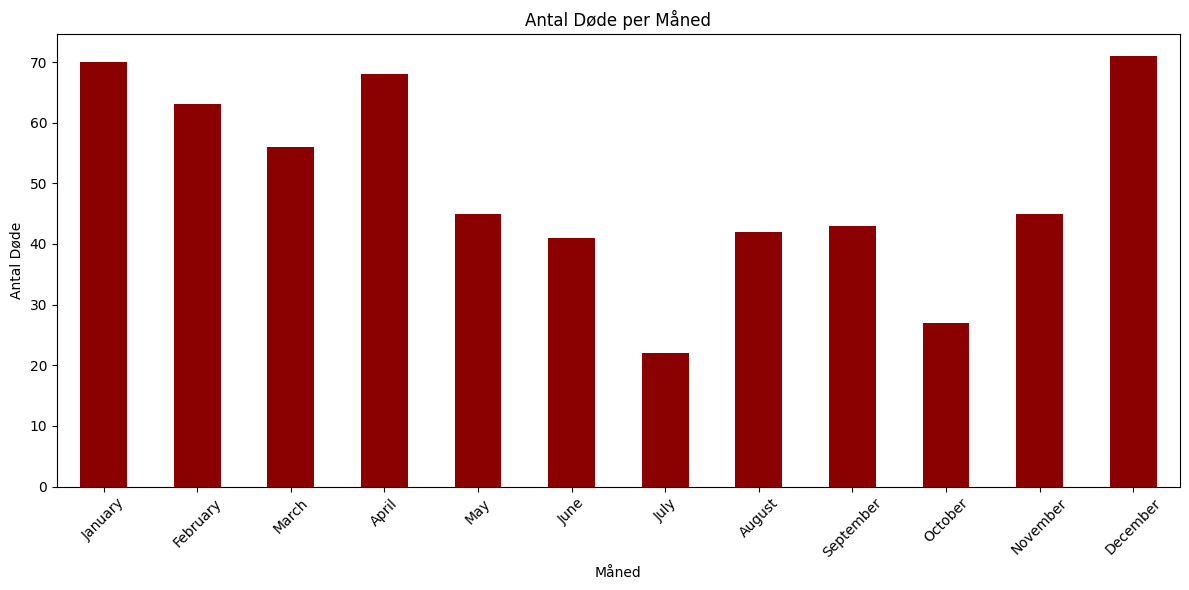

In [7]:
df = pd.read_excel("datasheet.xlsx")
death_months = df['Dødsmåned'].dropna()

# Jeg nægter at tro, at der ikke findes en bedre måde at gøre dette på, men det var nødvendigt at oversætte det hele til engelsk.
month_translation = {
    'januar': 'January', 'februar': 'February', 'marts': 'March', 'april': 'April', 'maj': 'May',
    'juni': 'June', 'juli': 'July', 'august': 'August', 'september': 'September', 'oktober': 'October',
    'november': 'November', 'december': 'December'
}
death_months_english = death_months.map(month_translation)

# Udregning
month_counts = death_months_english.value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
])
# Kombinér 'Dødsmåned' og 'måned' når Dødsmåneden ikke er tilgængelig
combined_months = df['Dødsmåned'].combine_first(df['måned'])
combined_months_english = combined_months.map(month_translation)
# Tæl antal per måned
combined_month_counts = combined_months_english.value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 6))
combined_month_counts.plot(kind='bar', color='darkred')
plt.title('Antal Døde per Måned')
plt.xlabel('Måned')
plt.ylabel('Antal Døde')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()